# A Repair Problem

### Solução para o Repair Problem, seção 7.7 do livro <i>Simulation</i>, do Sheldon Ross.

<img src="image7.4.png"> 

O problema dita que um sistema precisa de $n$ máquinas funcionando para operar. Esse sistema possui também algumas máquinas reservas, que serão usadas para substituir máquinas que quebrarem. As máquinas quebradas entram em uma fila para serem consertadas, e depois do seu reparo são realocadas para as máquinas reservas.

O sistema entra em colapso quando todas as máquinas reservas foram utilizadas e uma das máquinas em operação quebra.

Os tempos de reparo são modelados por uma função de distribuição $G$, e a probabilidade de uma máquina funcionar é modelado por uma outra função de distribuição $F$.

<img src="repairproblem.png"> 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

Usaremos a <b>distribuição Bernoulli</b> para modelar a quebra de cada uma das $n$ máquinas.

Essa é a distribuição mais intuitiva de ser utilizada pois modela uma chance de sucesso ou fracasso (quebra ou não) a cada instante de tempo.

In [2]:
def rBernoulli(n, p):
    # Entradas aleatórias
    u = np.random.sample(n) 
    # Vetor preenchido com zeros de tamanho n de amostras
    x = np.zeros(n) 
    
    for i in range(n): 
        # Não quebra
        if (u[i] < (1-p)):
            x[i] = 0
        # Quebra da máquina
        else:  
            x[i] = 1
    return x

Usaremos a <b>distribuição Poisson</b> para modelar o tempo de reparo das máquinas, por ser uma distribuição usada para modelar o tempo de chegada em filas. 

As máquinas formam justamente uma fila de espera para serem consertadas

In [3]:
def rPoisson(rate):
    x = np.zeros(1)
    u = np.random.sample(1)
    k  = 0
    pk = math.exp(-rate)
    Fk = pk
    
    while(1):
        if (u < Fk):
            x = k
            break
        pk = pk * rate /(k+1) 
        Fk = Fk + pk
        k  = k + 1
    return x

A função de <b>Repair Problem</b> retorna o tempo de quebra do sistema em função do número de máquinas $n$, o número de reservas $s$, a probabilidade de quebra de uma máquina a cada instante de tempo $p$ e o parâmetro da poisson $rate$.


In [4]:
def repairProblem(n, s, p, rate):
    t = 0
    
    # Número de máquinas quebradas no tempo t
    r = 0
    
    # Tempo que falta para primeira máquina quebrada na fila ser reparada
    tReparo = 0
    
    # Flag que indica que um reparo está sendo realizado
    flagReparo = 0
    
    while(1):
        t += 1
        
        # Primeiro passo: sortear quebra das máquinas
        x = rBernoulli(n, p)
        
        # Número de quebras no instante t
        nquebras = sum(x)
        
        # Atualizando o número de máquinas reservas disponíveis
        if (s >= nquebras):
            s -= nquebras
            r += nquebras
            
        # Não há máquinas reservas suficientes disponíveis
        else:
            return t
        
        # Se há máquinas quebradas e nenhuma delas já está sendo reparada: sorteia tempo de reparo
        if (r > 0 and tReparo == 0):
            tReparo = rPoisson(rate)
            
            # Flag de reparo acionada: aumentamos o números de máquinas extras e diminuimos a fila para reparo
            if (flagReparo):
                s += 1
                r -= 1
                flagReparo = 0
                
        # Caso contrário, decrementa o tempo de reparo atual
        elif (r > 0 and tReparo > 0 ):
            flagReparo = 1
            tReparo -= 1

Para testar e validar a função criada, vamos executar os seguintes testes:

- Número de máquinas necessárias muito maior do que número de máquinas extras, com baixa probabilidade de quebra

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


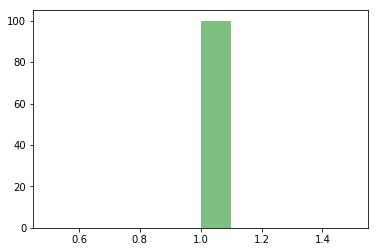

In [5]:
x = []
for i in range(100):
    x.append(repairProblem(100,5,0.2,3))

print(x)
plt.hist(x, facecolor='green', alpha=0.5)
plt.show()

- Número de máquinas necessárias muito maior do que número de máquinas extras, com alta probabilidade de quebra

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


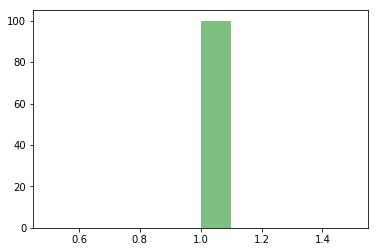

In [6]:
x = []
for i in range(100):
    x.append(repairProblem(100,5,0.8,3))

print(x)
plt.hist(x, facecolor='green', alpha=0.5)
plt.show()

- Número de máquinas necessárias igual ao número de máquinas extras, com baixa probabilidade de quebra

[8, 5, 5, 3, 5, 5, 5, 5, 10, 5, 5, 6, 8, 7, 8, 5, 6, 5, 6, 6, 4, 8, 5, 5, 3, 5, 6, 6, 6, 4, 6, 7, 5, 7, 6, 5, 6, 4, 6, 9, 5, 5, 5, 7, 7, 6, 4, 6, 4, 4, 4, 5, 5, 6, 7, 8, 6, 5, 5, 6, 5, 7, 7, 4, 4, 5, 7, 5, 8, 7, 7, 6, 5, 8, 4, 7, 6, 7, 5, 6, 5, 6, 6, 6, 7, 4, 5, 6, 3, 7, 5, 5, 6, 5, 6, 5, 7, 6, 6, 6]


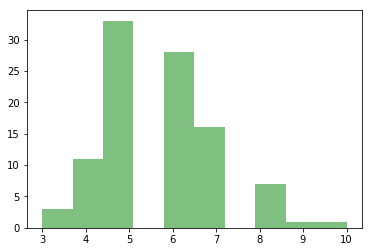

In [7]:
x = []
for i in range(100):
    x.append(repairProblem(20,20,0.2,3))

print(x)
plt.hist(x, facecolor='green', alpha=0.5)
plt.show()

- Número de máquinas necessárias igual ao que número de máquinas extras, com alta probabilidade de quebra

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2]


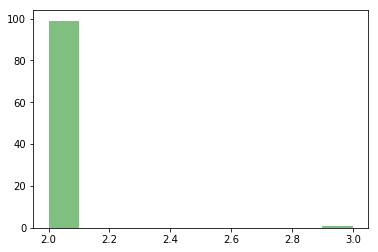

In [13]:
x = []
for i in range(100):
    x.append(repairProblem(20,20,0.7,3))

print(x)
plt.hist(x, facecolor='green', alpha=0.5)
plt.show()

- Número de máquinas necessárias muito menor do que número de máquinas extras, com baixa probabilidade de quebra

[128, 142, 151, 132, 121, 144, 138, 126, 135, 116, 116, 129, 124, 129, 112, 125, 139, 146, 119, 133, 124, 119, 125, 146, 129, 138, 118, 129, 128, 154, 124, 144, 128, 143, 145, 153, 119, 127, 131, 126, 122, 102, 125, 156, 130, 151, 143, 137, 131, 107, 152, 132, 130, 125, 147, 117, 134, 118, 140, 125, 110, 120, 126, 135, 111, 141, 117, 162, 129, 122, 126, 135, 111, 136, 113, 109, 145, 132, 144, 130, 149, 138, 109, 138, 136, 126, 124, 118, 123, 117, 125, 122, 147, 152, 107, 124, 115, 149, 135, 122]


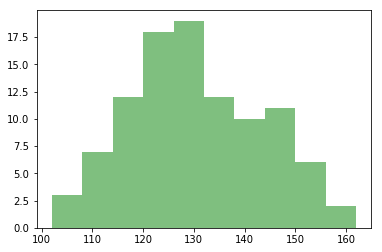

In [9]:
x = []
for i in range(100):
    x.append(repairProblem(5,100,0.2,3))

print(x)
plt.hist(x, facecolor='green', alpha=0.5)
plt.show()

- Número de máquinas necessárias muito menor do que número de máquinas extras, com alta probabilidade de quebra

[27, 28, 27, 25, 26, 28, 26, 26, 28, 25, 28, 28, 27, 28, 25, 26, 27, 26, 27, 26, 27, 28, 28, 31, 27, 27, 27, 27, 27, 26, 29, 27, 26, 29, 28, 27, 28, 29, 27, 27, 27, 27, 26, 26, 26, 26, 26, 28, 25, 28, 26, 26, 26, 27, 28, 29, 30, 26, 26, 27, 28, 26, 26, 28, 28, 29, 27, 26, 27, 27, 26, 28, 27, 27, 28, 30, 27, 26, 25, 27, 26, 27, 28, 26, 28, 27, 26, 28, 26, 27, 27, 29, 28, 29, 25, 27, 28, 25, 27, 28]


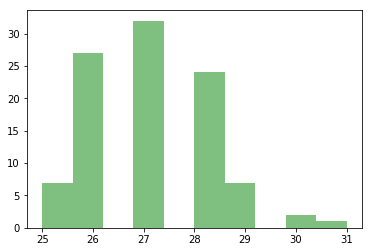

In [14]:
x = []
for i in range(100):
    x.append(repairProblem(5,100,0.8,3))

print(x)
plt.hist(x, facecolor='green', alpha=0.5)
plt.show()